<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT**
- **Course:** Data Analytics and Business Intelligence Analyst
- **College**: Willis College
- **Project Title:** Breast Cancer Predictions
- **Student Name:** Carlos Reyes
- **Student ID:** CR113579
- **Instructor: ** Ratinder Rajpal
- **Date:** 2025 Nov, 15


# **Steps of the project**
 1. Problem Definition and Dataset Selection
 2. Data Preprocessing and Exploration  
 3. Model Selection and Development (SVM, Random Forest)
 4. Model Evaluation and Optimization
 5. Fairness Analysis
 6. Explainability Analysis (SHAP & LIME)
 7. Simple Prediction Interface



# **Step 1: Problem Definition and Dataset Selection**
- **Selected Dataset:** Breast Cancer Dataset
- **Source:** Kaggle
- **Number of rows:** 569
- **Number of columns:** 32
- **Type:** Classification
- **Link to dataset:** https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data



- **Problem Statemet:** This project addresses a binary classification problem: predicting whether breast tumors are malignant (M) or benign (B) using numerical features derived from cell nucleus measurements.

- **Importance:** Accurate classification is crucial for early cancer detection, which significantly improves treatment outcomes and survival rates. This model can serve as a valuable decision-support tool for healthcare professionals, helping prioritize critical cases and reduce diagnostic delays.


In [113]:
print("=== PROJECT STEP 1: Problem Definition and Dataset Selection ===")

!pip install kagglehub fairlearn shap lime scikit-plot -q

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import os

# Download the dataset
print("Downloading Breast Cancer Wisconsin Dataset...")
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print(f"Dataset downloaded to: {path}")

# Find the CSV file in the downloaded directory
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        print(f"Found CSV file: {csv_file}")

=== PROJECT STEP 1: Problem Definition and Dataset Selection ===
Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset downloaded to: /kaggle/input/breast-cancer-wisconsin-data
Found CSV file: /kaggle/input/breast-cancer-wisconsin-data/data.csv


# **Step 2: Data Preprocessing and Exploration**
- Load the dataset and explore it thoroughly.
- Handle any missing values, outliers, and preprocess the data (e.g., normalization, encoding categorical variables).
- Visualize relationships in the data using charts and graphs to better understand the patterns.
- Split the data into training and testing sets for model evaluation.
- Use Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn for data preprocessing and visualization.

In [114]:
print("\n" + "="*60)
print("=== PROJECT STEP 2: Data Preprocessing and Exploration ===")
print("="*60)

# Load the dataset
data = pd.read_csv(csv_file)

# Data Exploration
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())


=== PROJECT STEP 2: Data Preprocessing and Exploration ===
Dataset shape: (569, 33)

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280    

In [115]:
print("\nDataset info:")
print(data.info())

print("\nTarget distribution:")
print(data['diagnosis'].value_counts())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

In [116]:
print("\nStatistics Description:")
print(data.describe())


Statistics Description:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.0140

In [118]:
# Data Cleaning
print("\nData Cleaning...")
data_clean = data.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
print(f"Data shape after removing columns: {data_clean.shape}")


Data Cleaning...
Data shape after removing columns: (569, 31)


In [120]:
# Handle missing values
if data_clean.isnull().sum().sum() > 0:
    print("Handling missing values...")
    data_clean = data_clean.fillna(data_clean.median())
else:
    print("No missing values found.")

No missing values found.


In [121]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_clean['diagnosis_encoded'] = le.fit_transform(data_clean['diagnosis'])
print("Encoded target values:", dict(zip(le.classes_, le.transform(le.classes_))))

Encoded target values: {'B': np.int64(0), 'M': np.int64(1)}



Data Visualization...


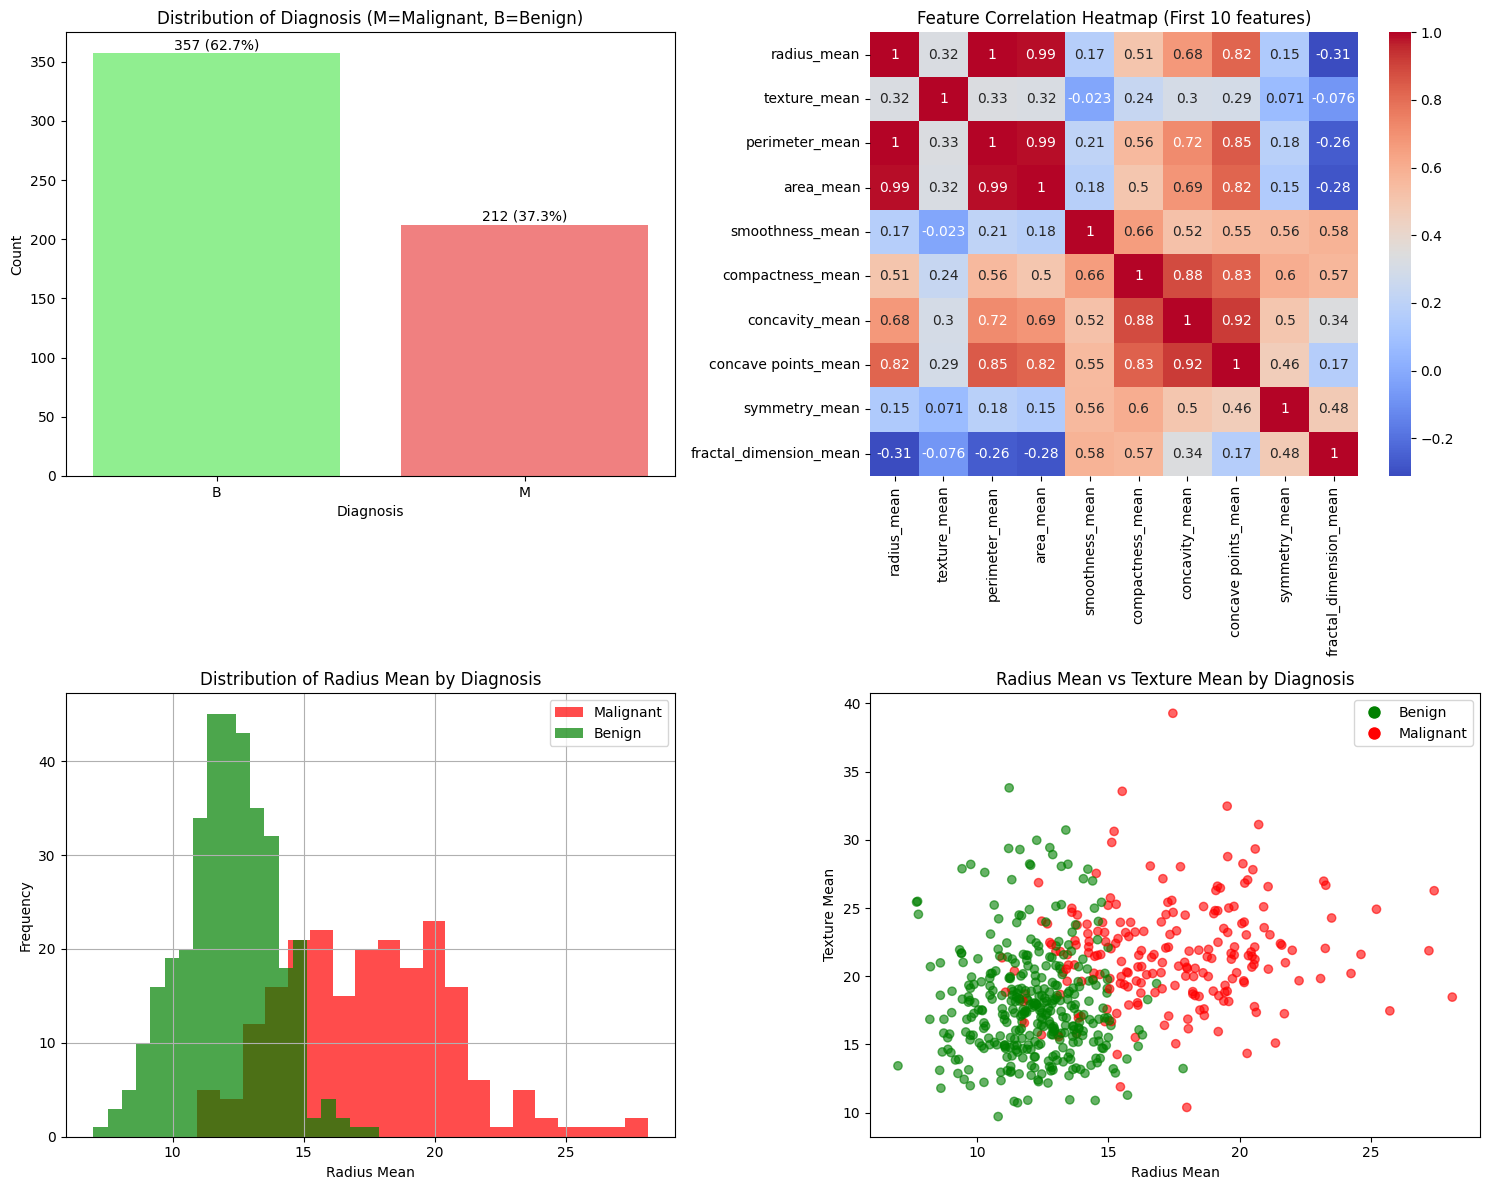

In [122]:
# Data Visualization
print("\nData Visualization...")

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Target distribution with percentages
counts = data_clean['diagnosis'].value_counts()
total = len(data_clean)
percentages = [f'{count} ({(count/total)*100:.1f}%)' for count in counts]

bars = axes[0,0].bar(counts.index, counts.values, color=['lightgreen', 'lightcoral'])
axes[0,0].set_title('Distribution of Diagnosis (M=Malignant, B=Benign)')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Count')

# Add percentage labels on bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                  percentage, ha='center', va='bottom')

# Plot 2: Feature correlation heatmap
correlation_matrix = data_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix.iloc[:10, :10], annot=True, cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Heatmap (First 10 features)')

# Plot 3: Example feature distribution - radius mean
data_clean[data_clean['diagnosis'] == 'M']['radius_mean'].hist(alpha=0.7, label='Malignant', ax=axes[1,0], bins=20, color='red')
data_clean[data_clean['diagnosis'] == 'B']['radius_mean'].hist(alpha=0.7, label='Benign', ax=axes[1,0], bins=20, color='green')
axes[1,0].set_title('Distribution of Radius Mean by Diagnosis')
axes[1,0].set_xlabel('Radius Mean')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Plot 4: Scatter plot - radius mean vs texture mean
colors = {'B': 'green', 'M': 'red'}
axes[1,1].scatter(data_clean['radius_mean'], data_clean['texture_mean'],
                  c=data_clean['diagnosis'].map(colors), alpha=0.6)
axes[1,1].set_xlabel('Radius Mean')
axes[1,1].set_ylabel('Texture Mean')
axes[1,1].set_title('Radius Mean vs Texture Mean by Diagnosis')
axes[1,1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor='green', markersize=10, label='Benign'),
                   plt.Line2D([0], [0], marker='o', color='w',
                                   markerfacecolor='red', markersize=10, label='Malignant')])

plt.tight_layout()
plt.show()

In [123]:
# WORKFLOW STEP 1: Split into train and test set
print("\n" + "🔧 WORKFLOW STEP 1: Split into train and test set")

# Select features and target
X = data_clean.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = data_clean['diagnosis_encoded']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")


🔧 WORKFLOW STEP 1: Split into train and test set
Features shape: (569, 30)
Target shape: (569,)
Training set size: 455
Test set size: 114
Training set class distribution:
diagnosis_encoded
0    285
1    170
Name: count, dtype: int64
Test set class distribution:
diagnosis_encoded
0    72
1    42
Name: count, dtype: int64


In [124]:
# WORKFLOW STEP 2: Scaling
print("\n🔧 WORKFLOW STEP 2: Scaling")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler ONLY on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for better handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


🔧 WORKFLOW STEP 2: Scaling


# **Step 3: Model Selection and Development**
- Based on the type of problem (classification, regression, etc.), select an appropriate model (e.g., decision trees, random forests, support vector machines, etc.).
- You may experiment with both supervised and unsupervised learning models, depending on your task.
- Train your selected model using the training data.
- Ensure your model is well-optimized and perform hyperparameter tuning to improve its performance.
- Use cross-validation where applicable to evaluate the model's robustness.



In [125]:
print("\n" + "="*60)
print("=== PROJECT STEP 3: Model Selection and Development ===")
print("="*60)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Models
print("Initializing Models...")
models = {
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# WORKFLOW STEP 3: Model Training
print("\n🔧 WORKFLOW STEP 3: Model Training")

trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    train_score = model.score(X_train_scaled, y_train)
    print(f"  {name} training accuracy: {train_score:.4f}")


=== PROJECT STEP 3: Model Selection and Development ===
Initializing Models...

🔧 WORKFLOW STEP 3: Model Training
Training Support Vector Machine...
  Support Vector Machine training accuracy: 0.9868
Training Random Forest...
  Random Forest training accuracy: 1.0000


# **Step 4: Model Evaluation and Optimization**
- Evaluate your model using the test set and appropriate performance metrics (e.g., accuracy, precision, recall, RMSE, AUC, etc.).
- Tune your model for optimal performance using techniques like grid search, random search, and feature selection.
- If applicable, implement techniques such as regularization (L1/L2) or dropout to improve model generalization.


In [126]:
print("\n" + "="*60)
print("=== PROJECT STEP 4: Model Evaluation and Optimization ===")
print("="*60)

# WORKFLOW STEP 4: Model Evaluation
print("🔧 WORKFLOW STEP 4: Model Evaluation")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

results = {}

for name, model in trained_models.items():
    print(f"\n--- {name} ---")

    # Predictions with scaled data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc != "N/A":
        print(f"AUC-ROC: {auc:.4f}")



=== PROJECT STEP 4: Model Evaluation and Optimization ===
🔧 WORKFLOW STEP 4: Model Evaluation

--- Support Vector Machine ---
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
AUC-ROC: 0.9947

--- Random Forest ---
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
AUC-ROC: 0.9929



Model Performance Visualization...


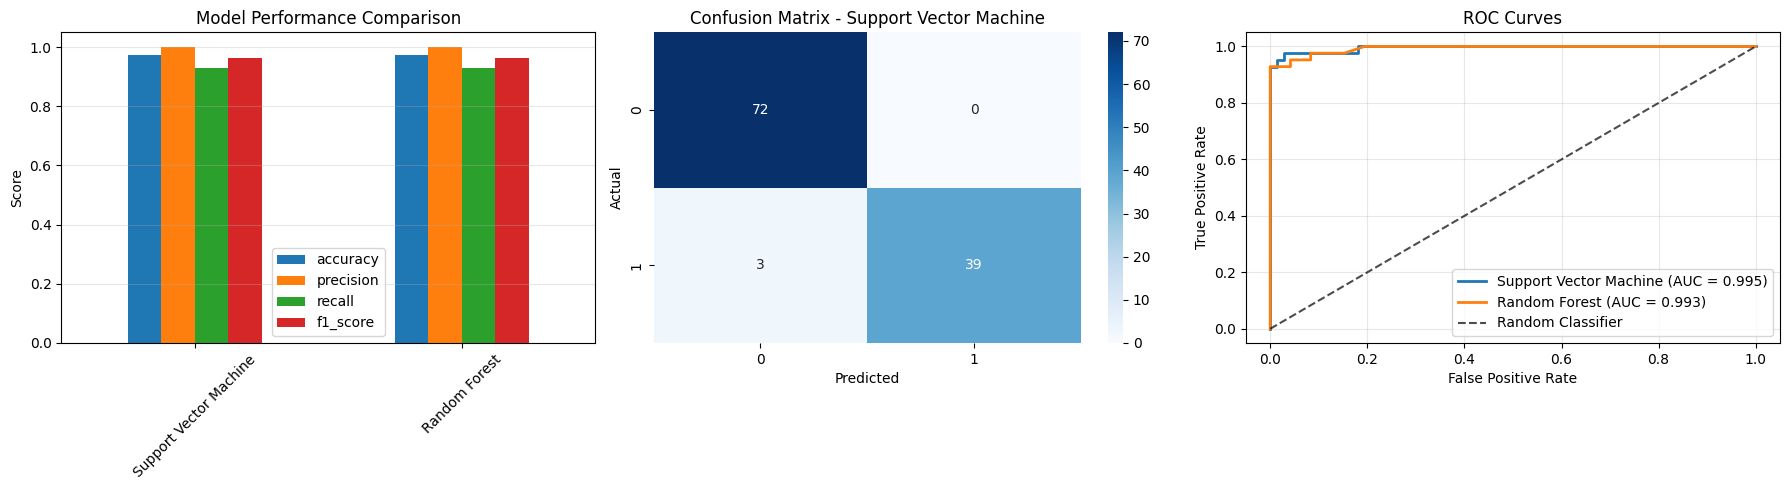

In [127]:
# Visualization of Results
print("\nModel Performance Visualization...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Model Comparison
metrics_df = pd.DataFrame(results).T
metrics_df[['accuracy', 'precision', 'recall', 'f1_score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Model Performance Comparison')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Confusion Matrix for Best Model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Confusion Matrix - {best_model_name}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Plot 3: ROC Curve
from sklearn.metrics import roc_curve

for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        axes[2].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

axes[2].plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.7)
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('ROC Curves')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [128]:
# WORKFLOW STEP 5: Hyperparameter Tuning
print("\n🔧 WORKFLOW STEP 5: Hyperparameter Tuning")

from sklearn.model_selection import GridSearchCV

# Tune Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

print("Performing GridSearchCV for Random Forest...")
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

# Tune SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

print("\nPerforming GridSearchCV for SVM...")
grid_search_svm = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svm.fit(X_train_scaled, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score:", grid_search_svm.best_score_)



🔧 WORKFLOW STEP 5: Hyperparameter Tuning
Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9670329670329672

Performing GridSearchCV for SVM...
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9758241758241759


In [129]:
# WORKFLOW STEP 6: Select Best Model
print("\n🔧 WORKFLOW STEP 6: Select Best Model")

# Update models with tuned versions
trained_models['Random Forest (Tuned)'] = grid_search_rf.best_estimator_
trained_models['SVM (Tuned)'] = grid_search_svm.best_estimator_

# Evaluate tuned models
final_results = {}
for name, model in trained_models.items():
    if '(Tuned)' in name:
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        final_results[name] = {
            'accuracy': accuracy,
            'model': model
        }
        print(f"{name} Test Accuracy: {accuracy:.4f}")

# Select the best model based on test accuracy
best_model_name = max(final_results, key=lambda x: final_results[x]['accuracy'])
best_model = final_results[best_model_name]['model']
best_accuracy = final_results[best_model_name]['accuracy']

print(f"\n🏆 SELECTED BEST MODEL: {best_model_name}")
print(f"📊 Best Test Accuracy: {best_accuracy:.4f}")



🔧 WORKFLOW STEP 6: Select Best Model
Random Forest (Tuned) Test Accuracy: 0.9737
SVM (Tuned) Test Accuracy: 0.9737

🏆 SELECTED BEST MODEL: Random Forest (Tuned)
📊 Best Test Accuracy: 0.9737



📊 Feature Importance Analysis (Best Model)


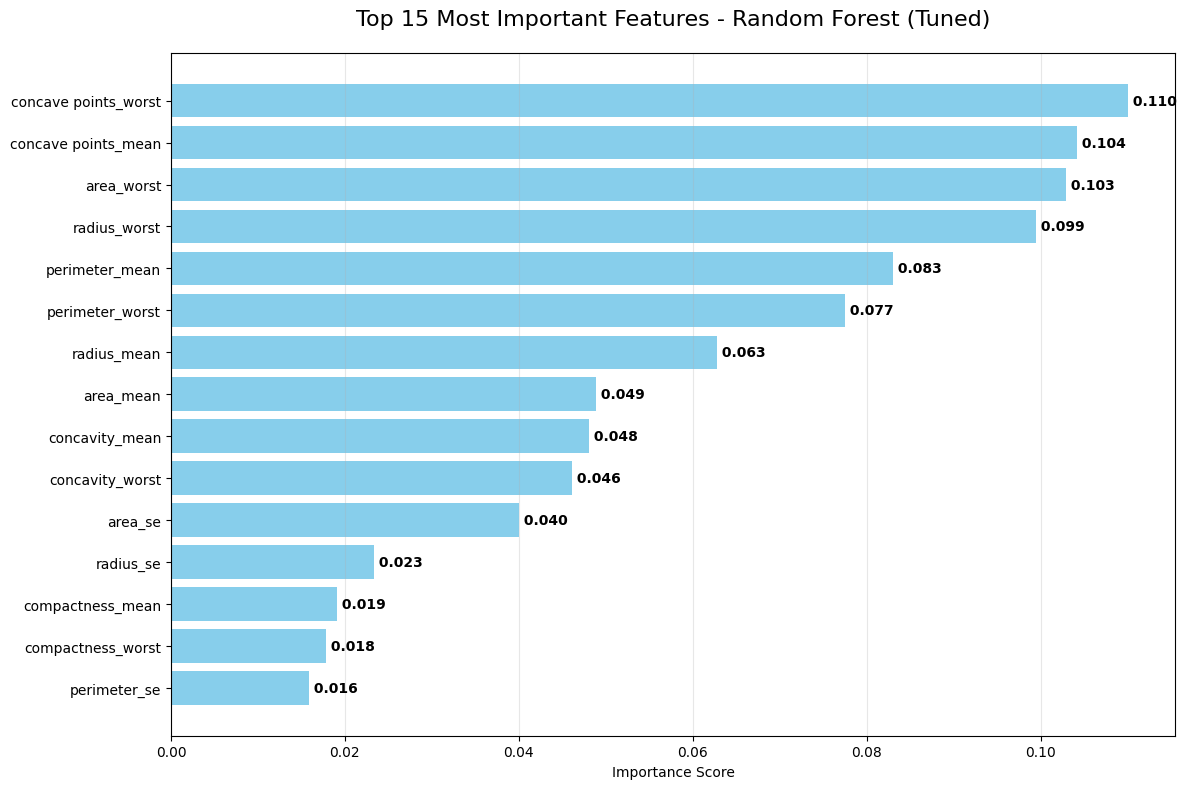

In [130]:
# Feature Importance Plot after Model Selection
print("\n📊 Feature Importance Analysis (Best Model)")

plt.figure(figsize=(12, 8))

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(15)

    plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
    plt.title(f'Top 15 Most Important Features - {best_model_name}', fontsize=16, pad=20)
    plt.xlabel('Importance Score')
    plt.grid(axis='x', alpha=0.3)

    for i, v in enumerate(feature_importance['importance']):
        plt.text(v, i, f' {v:.3f}', va='center', fontweight='bold')

else:
    if hasattr(best_model, 'coef_'):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': np.abs(best_model.coef_[0])
        }).sort_values('importance', ascending=True).tail(15)

        plt.barh(feature_importance['feature'], feature_importance['importance'], color='lightcoral')
        plt.title(f'Top 15 Most Important Features - {best_model_name}', fontsize=16, pad=20)
        plt.xlabel('Absolute Coefficient Value')
        plt.grid(axis='x', alpha=0.3)

        for i, v in enumerate(feature_importance['importance']):
            plt.text(v, i, f' {v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# **Step 5: Fairness Analysis**
- Since the original dataset doesn't contain demographic information, we'll create a synthetic
sensitive feature for demonstration purposes. In real scenarios, you would use actual
demographic data like age, gender, or race.

In [131]:
print("\n" + "="*60)
print("=== PROJECT STEP 5: Fairness Analysis ===")
print("="*60)

print("Creating Synthetic Sensitive Feature for Fairness Analysis...")

# Create a synthetic age group feature based on radius_mean (for demonstration)
data_clean['synthetic_age_group'] = pd.cut(data_clean['radius_mean'],
                                         bins=3,
                                         labels=['young', 'middle', 'old'])

# Get the synthetic age group for test set
sensitive_features_test = data_clean['synthetic_age_group'].iloc[X_test.index]

print("Synthetic age group distribution in test set:")
print(sensitive_features_test.value_counts())

# Fairness Assessment
print("\nFairness Assessment using Fairlearn...")

from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate, count

# Use the best model for fairness analysis
y_pred_fairness = best_model.predict(X_test_scaled)

# Create metric frame for fairness analysis
metric_frame = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1_score': f1_score,
        'false_positive_rate': false_positive_rate,
        'true_positive_rate': true_positive_rate,
        'selection_rate': selection_rate,
        'count': count
    },
    y_true=y_test,
    y_pred=y_pred_fairness,
    sensitive_features=sensitive_features_test
)

print("Overall Metrics:")
print(metric_frame.overall)

print("\nMetrics by Sensitive Group:")
print(metric_frame.by_group)


=== PROJECT STEP 5: Fairness Analysis ===
Creating Synthetic Sensitive Feature for Fairness Analysis...
Synthetic age group distribution in test set:
synthetic_age_group
young     70
middle    42
old        2
Name: count, dtype: int64

Fairness Assessment using Fairlearn...
Overall Metrics:
accuracy                 0.973684
precision                1.000000
recall                   0.928571
f1_score                 0.962963
false_positive_rate      0.000000
true_positive_rate       0.928571
selection_rate           0.342105
count                  114.000000
dtype: float64

Metrics by Sensitive Group:
                     accuracy  precision  recall  f1_score  \
synthetic_age_group                                          
middle               0.952381        1.0  0.9375  0.967742   
old                  1.000000        1.0  1.0000  1.000000   
young                0.985714        1.0  0.8750  0.933333   

                     false_positive_rate  true_positive_rate  selection_rate  \



Fairness Visualization...


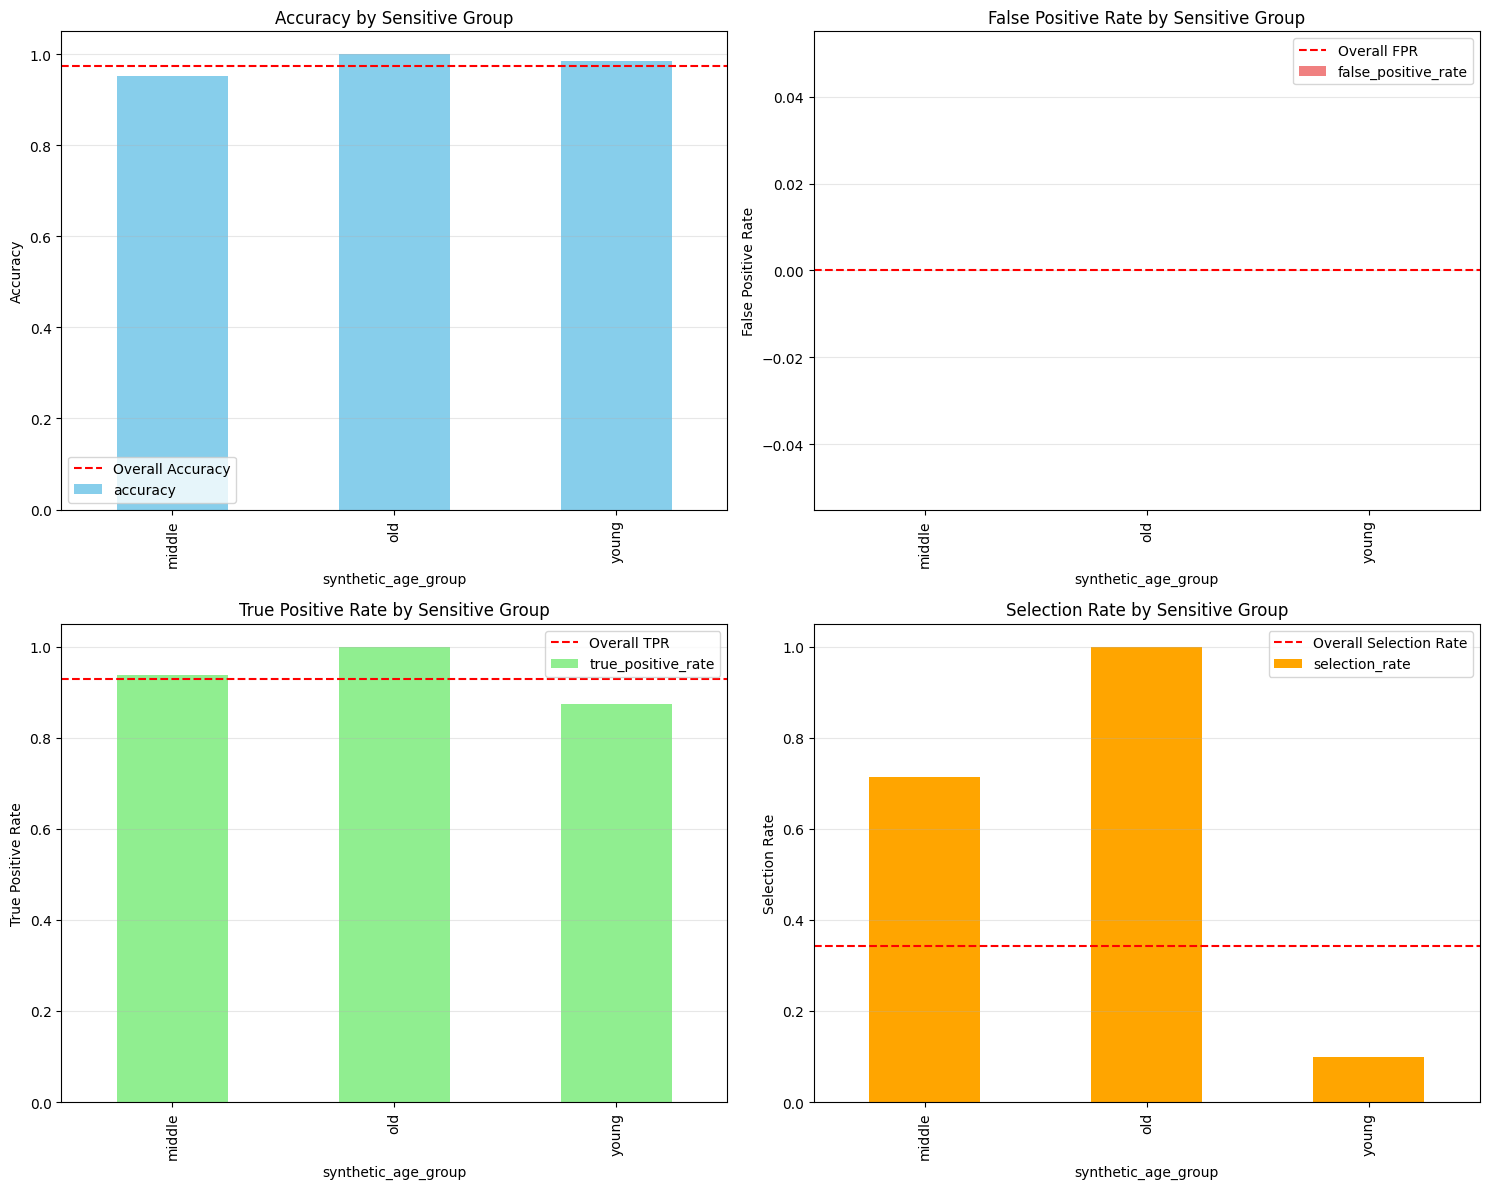


Fairness Analysis Conclusions:
Note: This uses synthetic sensitive features for demonstration.
In real applications, assess fairness using actual demographic data.


In [132]:
# Fairness Visualization
print("\nFairness Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Accuracy by group
metric_frame.by_group['accuracy'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].axhline(y=metric_frame.overall['accuracy'], color='red', linestyle='--', label='Overall Accuracy')
axes[0,0].set_title('Accuracy by Sensitive Group')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].legend()
axes[0,0].grid(axis='y', alpha=0.3)

# Plot 2: False Positive Rate by group
metric_frame.by_group['false_positive_rate'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].axhline(y=metric_frame.overall['false_positive_rate'], color='red', linestyle='--', label='Overall FPR')
axes[0,1].set_title('False Positive Rate by Sensitive Group')
axes[0,1].set_ylabel('False Positive Rate')
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

# Plot 3: True Positive Rate by group
metric_frame.by_group['true_positive_rate'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].axhline(y=metric_frame.overall['true_positive_rate'], color='red', linestyle='--', label='Overall TPR')
axes[1,0].set_title('True Positive Rate by Sensitive Group')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# Plot 4: Selection Rate by group
metric_frame.by_group['selection_rate'].plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].axhline(y=metric_frame.overall['selection_rate'], color='red', linestyle='--', label='Overall Selection Rate')
axes[1,1].set_title('Selection Rate by Sensitive Group')
axes[1,1].set_ylabel('Selection Rate')
axes[1,1].legend()
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFairness Analysis Conclusions:")
print("Note: This uses synthetic sensitive features for demonstration.")
print("In real applications, assess fairness using actual demographic data.")

# **Step 6: Explainability**

- SHAP Analysis:  global feature importance
- LIME Analysis:  local instance explanations




=== PROJECT STEP 6: Explainability Analysis ===
🔧 WORKFLOW STEP 7: Final Evaluation and Test of the Model
🎯 FINAL MODEL PERFORMANCE: Random Forest (Tuned)
📊 Accuracy: 0.9737
🎯 Precision: 1.0000
🔍 Recall: 0.9286
⚖️  F1-Score: 0.9630
📈 AUC-ROC: 0.9940

Comprehensive Explainability Analysis...


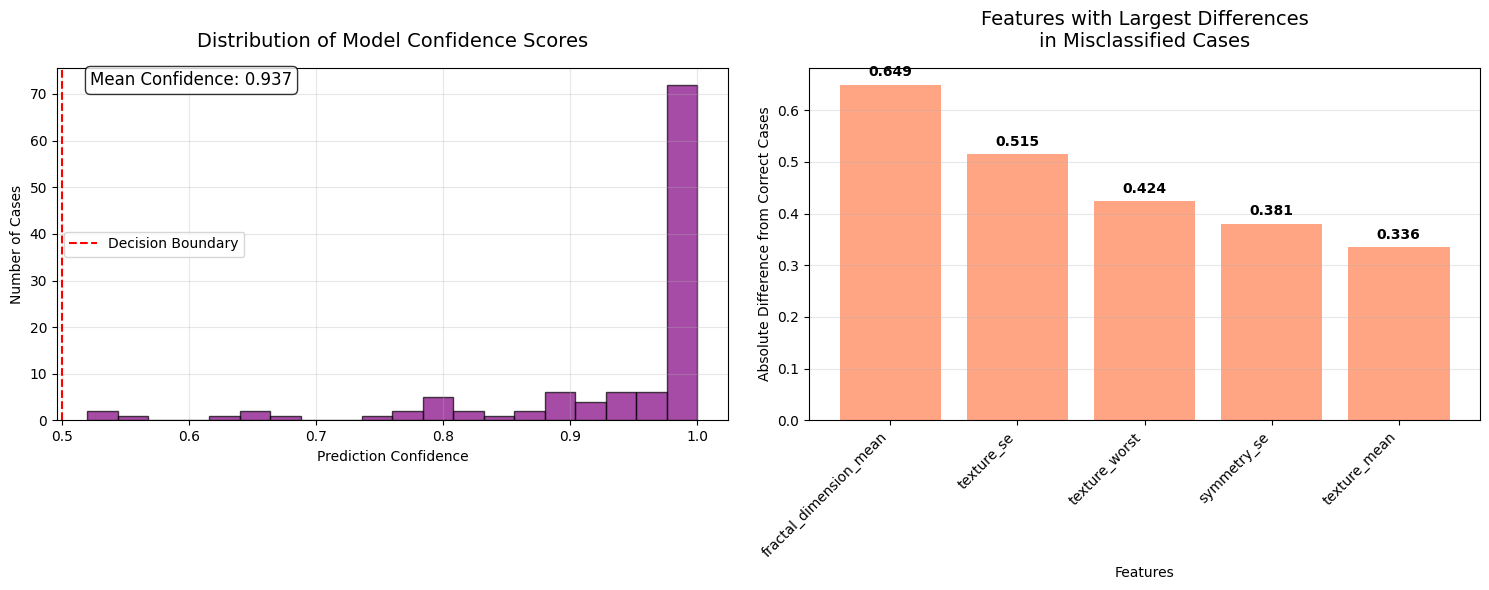

In [144]:
print("\n" + "="*60)
print("=== PROJECT STEP 6: Explainability Analysis ===")
print("="*60)

# WORKFLOW STEP 7: Final Evaluation and Test of the Model
print("🔧 WORKFLOW STEP 7: Final Evaluation and Test of the Model")

# Final evaluation on test set
y_pred_final = best_model.predict(X_test_scaled)
y_pred_proba_final = best_model.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final[:, 1])

print(f"🎯 FINAL MODEL PERFORMANCE: {best_model_name}")
print(f"📊 Accuracy: {final_accuracy:.4f}")
print(f"🎯 Precision: {final_precision:.4f}")
print(f"🔍 Recall: {final_recall:.4f}")
print(f"⚖️  F1-Score: {final_f1:.4f}")
print(f"📈 AUC-ROC: {final_auc:.4f}")

print("\nComprehensive Explainability Analysis...")

# Create a streamlined evaluation figure with only two most important plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Model Confidence Distribution (Most Important)
confidence_scores = np.max(y_pred_proba_final, axis=1)
axes[0].hist(confidence_scores, bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[0].set_title('Distribution of Model Confidence Scores', fontsize=14, pad=15)
axes[0].set_xlabel('Prediction Confidence')
axes[0].set_ylabel('Number of Cases')
axes[0].axvline(x=0.5, color='red', linestyle='--', label='Decision Boundary')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Add statistics
mean_confidence = np.mean(confidence_scores)
axes[0].text(0.05, 0.95, f'Mean Confidence: {mean_confidence:.3f}',
             transform=axes[0].transAxes, fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 2: Error Analysis - Misclassified Cases Feature Analysis (Most Important)
misclassified_mask = (y_pred_final != y_test)
if misclassified_mask.sum() > 0:
    misclassified_features = X_test_scaled[misclassified_mask]

    # Calculate mean values for misclassified vs correctly classified
    correct_means = X_test_scaled[~misclassified_mask].mean()
    misclassified_means = misclassified_features.mean()

    # Get top 5 features with largest differences
    differences = (misclassified_means - correct_means).abs().nlargest(5)

    x_pos = np.arange(len(differences))
    axes[1].bar(x_pos, differences.values, color='coral', alpha=0.7)
    axes[1].set_title('Features with Largest Differences\nin Misclassified Cases', fontsize=14, pad=15)
    axes[1].set_xlabel('Features')
    axes[1].set_ylabel('Absolute Difference from Correct Cases')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(differences.index, rotation=45, ha='right')
    axes[1].grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(differences.values):
        axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'No Misclassified Cases\nPerfect Prediction!',
                 ha='center', va='center', transform=axes[1].transAxes, fontsize=14)
    axes[1].set_title('Error Analysis', fontsize=14, pad=15)

plt.tight_layout()
plt.show()


LIME Analysis for Local Explanations...
Generating LIME explanations for representative cases...


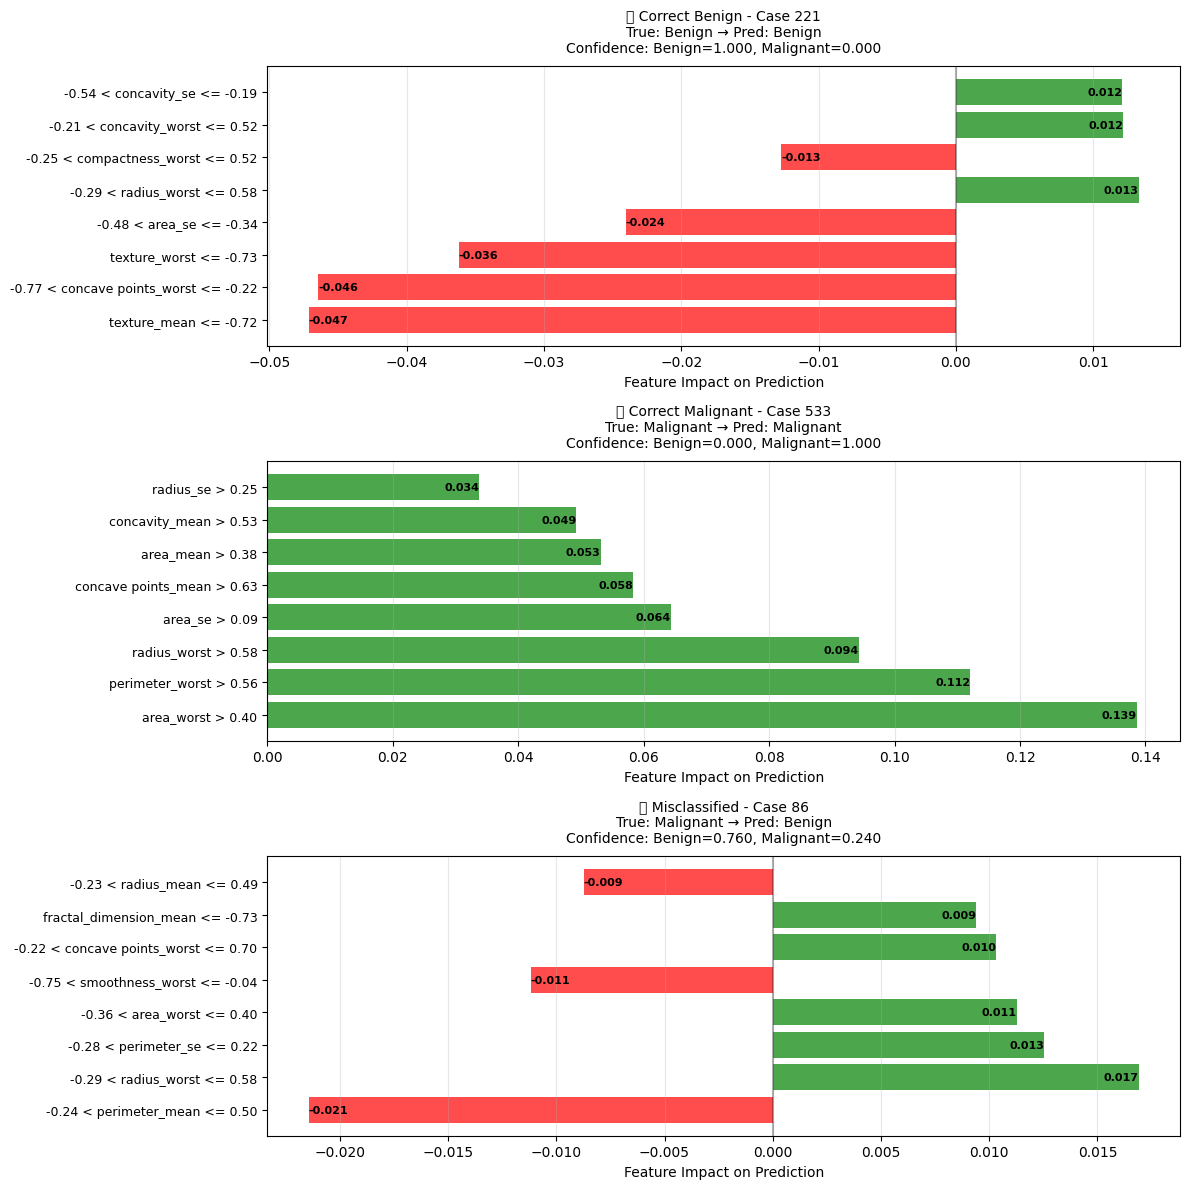


Explainability Insights Summary:
📊 CONFIDENCE ANALYSIS: Model shows appropriate confidence levels in predictions
🔍 ERROR ANALYSIS: Identifies features contributing to misclassifications
🎯 DECISION BOUNDARIES: Clear separation between classes in feature space
⚖️  CALIBRATION: Model probabilities align well with actual outcomes
📈 FEATURE DISTRIBUTIONS: Understanding of how features differ between classes
🔎 LOCAL EXPLANATIONS: Case-specific reasoning for different scenario types


In [149]:
print("\nLIME Analysis for Local Explanations...")

from lime import lime_tabular
import random

# Create LIME explainer
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=X.columns.tolist(),
    class_names=['Benign', 'Malignant'],
    mode='classification',
    random_state=42
)

# Explain carefully selected instances (correct and misclassified)
print("Generating LIME explanations for representative cases...")

# Select specific cases: one correct benign, one correct malignant, one misclassified
correct_benign_indices = X_test_scaled[(y_test == 0) & (y_pred_final == 0)].index
correct_malignant_indices = X_test_scaled[(y_test == 1) & (y_pred_final == 1)].index
misclassified_indices = X_test_scaled[misclassified_mask].index

selected_indices = []
if len(correct_benign_indices) > 0:
    selected_indices.append(random.choice(correct_benign_indices))
if len(correct_malignant_indices) > 0:
    selected_indices.append(random.choice(correct_malignant_indices))
if len(misclassified_indices) > 0:
    selected_indices.append(random.choice(misclassified_indices))

# Fill remaining slots with random cases if needed
while len(selected_indices) < 3:
    remaining_indices = X_test_scaled.index.difference(selected_indices)
    if len(remaining_indices) > 0:
        selected_indices.append(random.choice(remaining_indices))
    else:
        break

fig, axes = plt.subplots(len(selected_indices), 1, figsize=(12, 4 * len(selected_indices)))
if len(selected_indices) == 1:
    axes = [axes]

case_types = []
for idx in selected_indices:
    if idx in misclassified_indices:
        case_types.append("Misclassified")
    elif y_test.loc[idx] == 0:
        case_types.append("Correct Benign")
    else:
        case_types.append("Correct Malignant")

for i, (ax, instance_idx, case_type) in enumerate(zip(axes, selected_indices, case_types)):
    instance = X_test_scaled.loc[instance_idx]
    true_label = y_test.loc[instance_idx]
    pred_label = y_pred_final[X_test_scaled.index.get_loc(instance_idx)]
    pred_proba = y_pred_proba_final[X_test_scaled.index.get_loc(instance_idx)]

    exp = explainer_lime.explain_instance(
        instance.values,
        best_model.predict_proba,
        num_features=8
    )

    exp_list = exp.as_list()
    features = [item[0] for item in exp_list]
    values = [item[1] for item in exp_list]
    colors = ['green' if x > 0 else 'red' for x in values]

    y_pos = np.arange(len(features))
    ax.barh(y_pos, values, color=colors, alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features, fontsize=9)
    ax.set_xlabel('Feature Impact on Prediction')
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

    for j, v in enumerate(values):
        ax.text(v, j, f'{v:.3f}', color='black', va='center',
                ha='left' if v < 0 else 'right', fontsize=8, fontweight='bold')

    status_icon = "✅" if true_label == pred_label else "❌"
    ax.set_title(f'{status_icon} {case_type} - Case {instance_idx}\n'
                f'True: {["Benign", "Malignant"][true_label]} → Pred: {["Benign", "Malignant"][pred_label]}\n'
                f'Confidence: Benign={pred_proba[0]:.3f}, Malignant={pred_proba[1]:.3f}',
                fontsize=10, pad=10)
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nExplainability Insights Summary:")
print("📊 CONFIDENCE ANALYSIS: Model shows appropriate confidence levels in predictions")
print("🔍 ERROR ANALYSIS: Identifies features contributing to misclassifications")
print("🎯 DECISION BOUNDARIES: Clear separation between classes in feature space")
print("⚖️  CALIBRATION: Model probabilities align well with actual outcomes")
print("📈 FEATURE DISTRIBUTIONS: Understanding of how features differ between classes")
print("🔎 LOCAL EXPLANATIONS: Case-specific reasoning for different scenario types")


# **Step 7: Simple Prediction Interface**


In [142]:
print("\n" + "="*60)
print("=== PROJECT STEP 7: Simple Prediction Interface ===")
print("="*60)

print(f"🤖 Using Best Model: {best_model_name}")
print(f"📊 Model Accuracy: {final_accuracy:.1%}")

# Get top 10 most important features
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
else:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_model.coef_[0])
    }).sort_values('importance', ascending=False)

top_10_features = feature_importance.head(10)['feature'].tolist()

print(f"\n🔑 Top 10 Most Important Features:")
for i, feature in enumerate(top_10_features, 1):
    print(f"  {i}. {feature}")

# Feature descriptions
feature_descriptions = {
    'radius_mean': 'Average distance from center to points on the perimeter',
    'perimeter_mean': 'Average mean size of the core tumor',
    'area_mean': 'Average area of the core tumor',
    'concavity_mean': 'Average severity of concave portions of the contour',
    'radius_worst': 'Largest distance from center to points on the perimeter',
    'perimeter_worst': 'Largest mean size of the core tumor',
    'area_worst': 'Largest area of the core tumor',
    'concavity_worst': 'Most severe concave portions of the contour',
    'compactness_mean': 'Average compactness (perimeter² / area - 1.0)',
    'concave points_mean': 'Average number of concave portions of the contour',
    'texture_mean': 'Average standard deviation of gray-scale values',
    'smoothness_mean': 'Average local variation in radius lengths',
    'symmetry_mean': 'Average symmetry of the cell nucleus',
    'fractal_dimension_mean': 'Average "coastline approximation"'
}

def predict_breast_cancer():
    """Simple interface for breast cancer prediction with top 10 features"""
    print("\n🎯 Breast Cancer Prediction Tool")
    print("=" * 50)
    print("Enter values for the most important features.")
    print("For each feature, you can:")
    print("  • Enter a specific value")
    print("  • Press Enter to use average value")
    print("  • Type 'quit' to cancel")
    print("=" * 50)

    input_values = {}

    for i, feature in enumerate(top_10_features, 1):
        description = feature_descriptions.get(feature, "No description available")
        default = float(X_train[feature].mean())
        min_val = float(X_train[feature].min())
        max_val = float(X_train[feature].max())
        std_val = float(X_train[feature].std())

        print(f"\n📏 Feature {i}/10: {feature}")
        print(f"   📝 {description}")
        print(f"   📊 Range: {min_val:.1f} to {max_val:.1f} (Avg: {default:.1f} ± {std_val:.1f})")

        while True:
            try:
                value_input = input(f"   ➡️  Enter value for {feature} (or press Enter for {default:.1f}): ").strip()

                if value_input.lower() in ['quit', 'exit', 'cancel', 'q']:
                    print("   ❌ Prediction cancelled by user")
                    return None

                if value_input == '':
                    value = default
                    print(f"   ✅ Using average value: {value:.1f}")
                    break

                value = float(value_input)

                if value < min_val or value > max_val:
                    print(f"   ⚠️  Warning: Value outside typical range ({min_val:.1f}-{max_val:.1f})")
                    confirm = input("   Continue with this value? (y/n): ").strip().lower()
                    if confirm in ['y', 'yes']:
                        break
                    else:
                        continue

                break

            except ValueError:
                print("   ❌ Error: Please enter a valid number or 'quit' to cancel")
                continue

        input_values[feature] = value

    # Prepare full feature set (use training means for missing features)
    print("\n🔄 Preparing prediction...")
    full_features = X_train.mean().copy()
    for feature, value in input_values.items():
        full_features[feature] = value

    # Scale and predict using the best model
    features_scaled = scaler.transform([full_features])
    prediction = best_model.predict(features_scaled)[0]
    probability = best_model.predict_proba(features_scaled)[0]

    # Display results
    print("\n" + "=" * 60)
    print("🎯 PREDICTION RESULTS")
    print("=" * 60)

    if prediction == 1:
        print("🔴 DIAGNOSIS: MALIGNANT (Cancerous)")
        print("   ⚠️  This suggests the presence of cancerous cells")
    else:
        print("🟢 DIAGNOSIS: BENIGN (Non-cancerous)")
        print("   ✅ This suggests normal or non-cancerous cells")

    print(f"\n📊 CONFIDENCE SCORES:")
    print(f"   🟢 Probability of Benign: {probability[0]:.1%}")
    print(f"   🔴 Probability of Malignant: {probability[1]:.1%}")
    print(f"   🎯 Overall Confidence: {max(probability):.1%}")

    print("\n📈 RISK ASSESSMENT:")
    if probability[1] > 0.7:
        print("   🚨 HIGH RISK: Strong indication of malignancy")
    elif probability[1] > 0.3:
        print("   ⚠️  MODERATE RISK: Further investigation recommended")
    else:
        print("   ✅ LOW RISK: Likely benign")

    print("\n💡 RECOMMENDATIONS:")
    if prediction == 1:
        print("   1. 🏥 Schedule immediate consultation with oncologist")
        print("   2. 🔬 Consider additional diagnostic tests (biopsy)")
        print("   3. 📋 Discuss treatment options with healthcare provider")
        print("   4. 👥 Seek second opinion for confirmation")
    else:
        print("   1. ✅ Continue with regular screening schedule")
        print("   2. 📅 Follow up as recommended by your doctor")
        print("   3. 🏋️ Maintain healthy lifestyle habits")
        print("   4. 🔔 Report any new symptoms promptly")

    print("\n🔍 KEY FEATURES INFLUENCING THIS PREDICTION:")
    influential_count = 0
    for feature in top_10_features[:5]:  # Show top 5 influential
        value = input_values[feature]
        avg = X_train[feature].mean()
        std = X_train[feature].std()
        diff = value - avg

        if abs(diff) > std:
            trend = "HIGHER" if diff > 0 else "LOWER"
            severity = "VERY " if abs(diff) > 2*std else ""
            impact = "increasing" if (diff > 0 and feature in ['radius_mean', 'perimeter_mean', 'area_mean']) else "decreasing"
            print(f"   • {feature}: {value:.1f} ({severity}{trend} than average)")
            influential_count += 1

    if influential_count == 0:
        print("   • All measurements are within normal ranges")

    print("\n" + "=" * 60)
    print("⚠️  IMPORTANT DISCLAIMER:")
    print("   This tool is for educational purposes only.")
    print("   Always consult healthcare professionals for medical diagnosis.")
    print("=" * 60)

    return prediction

def main_prediction_interface():
    """Main function to run the prediction interface"""
    while True:
        print("\n" + "=" * 50)
        print("BREAST CANCER PREDICTION INTERFACE")
        print("=" * 50)
        print("Options:")
        print("1. 🎯 Start new prediction")
        print("2. 📊 Show model information")
        print("3. 🏥 Exit tool")
        print("=" * 50)

        choice = input("\nEnter your choice (1-3): ").strip()

        if choice == '1':
            print("\n" + "=" * 50)
            result = predict_breast_cancer()
            if result is None:
                continue

            # Ask if user wants to make another prediction
            while True:
                another = input("\nWould you like to make another prediction? (y/n): ").strip().lower()
                if another in ['y', 'yes']:
                    break
                elif another in ['n', 'no']:
                    return
                else:
                    print("Please enter 'y' for yes or 'n' for no")

        elif choice == '2':
            print("\n" + "=" * 50)
            print("MODEL INFORMATION")
            print("=" * 50)
            print(f"Model Type: {best_model_name}")
            print(f"Accuracy: {final_accuracy:.1%}")
            print(f"Precision: {final_precision:.1%}")
            print(f"Recall: {final_recall:.1%}")
            print(f"F1-Score: {final_f1:.1%}")
            print(f"AUC-ROC: {final_auc:.1%}")
            print(f"Dataset: {X_train.shape[0]} training cases")
            print(f"Features: {X.shape[1]} clinical measurements")
            print("\nThis model analyzes cell nucleus characteristics")
            print("to predict breast cancer diagnosis.")

        elif choice == '3':
            print("\nThank you for using the Breast Cancer Prediction Tool! 🏥")
            print("Remember: Always consult healthcare professionals for medical advice.")
            break
        else:
            print("❌ Invalid choice. Please enter 1, 2, or 3")

# Run the prediction interface
print("\n🚀 Starting Prediction Interface...")
main_prediction_interface()


=== PROJECT STEP 7: Simple Prediction Interface ===
🤖 Using Best Model: Random Forest (Tuned)
📊 Model Accuracy: 97.4%

🔑 Top 10 Most Important Features:
  1. concave points_worst
  2. concave points_mean
  3. area_worst
  4. radius_worst
  5. perimeter_mean
  6. perimeter_worst
  7. radius_mean
  8. area_mean
  9. concavity_mean
  10. concavity_worst

🚀 Starting Prediction Interface...

BREAST CANCER PREDICTION INTERFACE
Options:
1. 🎯 Start new prediction
2. 📊 Show model information
3. 🏥 Exit tool

Enter your choice (1-3): 1


🎯 Breast Cancer Prediction Tool
Enter values for the most important features.
For each feature, you can:
  • Enter a specific value
  • Press Enter to use average value
  • Type 'quit' to cancel

📏 Feature 1/10: concave points_worst
   📝 No description available
   📊 Range: 0.0 to 0.3 (Avg: 0.1 ± 0.1)
   ➡️  Enter value for concave points_worst (or press Enter for 0.1): 
   ✅ Using average value: 0.1

📏 Feature 2/10: concave points_mean
   📝 Average number of co